In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
#Usage Based Churn:
telecom['churn'] = (telecom.total_ic_mou_9 == 0) & (telecom.total_og_mou_9 == 0) & ( (telecom.vol_2g_mb_9 == 0) | (telecom.vol_3g_mb_9 == 0) )

#removing 9th month features
telecom = telecom.drop(list(telecom.filter(regex='_9')), axis=1)

telecom.shape

(99999, 173)

In [7]:
telecom.churn.value_counts()

False    89483
True     10516
Name: churn, dtype: int64

In [8]:
# Filtering hight value customer
telecom['av_rech_amt'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_7) / (telecom.total_rech_num_6 + telecom.total_rech_num_7)
telecom.av_rech_amt.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

count    99814.000000
mean        48.304356
std         52.076165
min          0.000000
10%         12.214865
20%         17.777778
30%         23.235294
40%         29.142857
50%         36.645752
60%         45.333333
70%         56.387518
80%         70.800000
90%         92.000000
99%        217.365000
max       4010.000000
Name: av_rech_amt, dtype: float64

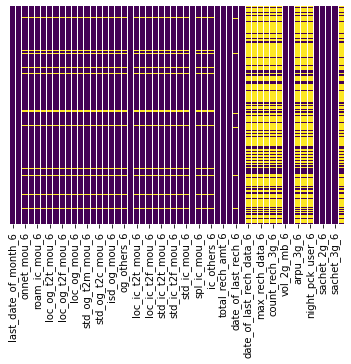

In [9]:
sns.heatmap(telecom[list(telecom.filter(regex='_6'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [10]:
telecom.churn.value_counts()

False    89483
True     10516
Name: churn, dtype: int64

In [11]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 174 entries, mobile_number to av_rech_amt
dtypes: bool(1), float64(137), int64(27), object(9)
memory usage: 132.1+ MB


In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
telecom.describe(exclude=['bool', 'float64', 'int64'])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,99999,99398,98899,98392,98232,96377,25153,25571,26339
unique,1,1,1,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,99999,99398,98899,16960,17288,14706,1888,1813,1998


In [13]:
telecom['last_date_of_month_6'] = pd.to_datetime(telecom['last_date_of_month_6'])
telecom['last_date_of_month_7'] = pd.to_datetime(telecom['last_date_of_month_7'])
telecom['last_date_of_month_8'] = pd.to_datetime(telecom['last_date_of_month_8'])
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'])
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'])
telecom['date_of_last_rech_data_6'] = pd.to_datetime(telecom['date_of_last_rech_data_6'])
telecom['date_of_last_rech_data_7'] = pd.to_datetime(telecom['date_of_last_rech_data_7'])
telecom['date_of_last_rech_data_8'] = pd.to_datetime(telecom['date_of_last_rech_data_8'])


In [14]:
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2f_mou

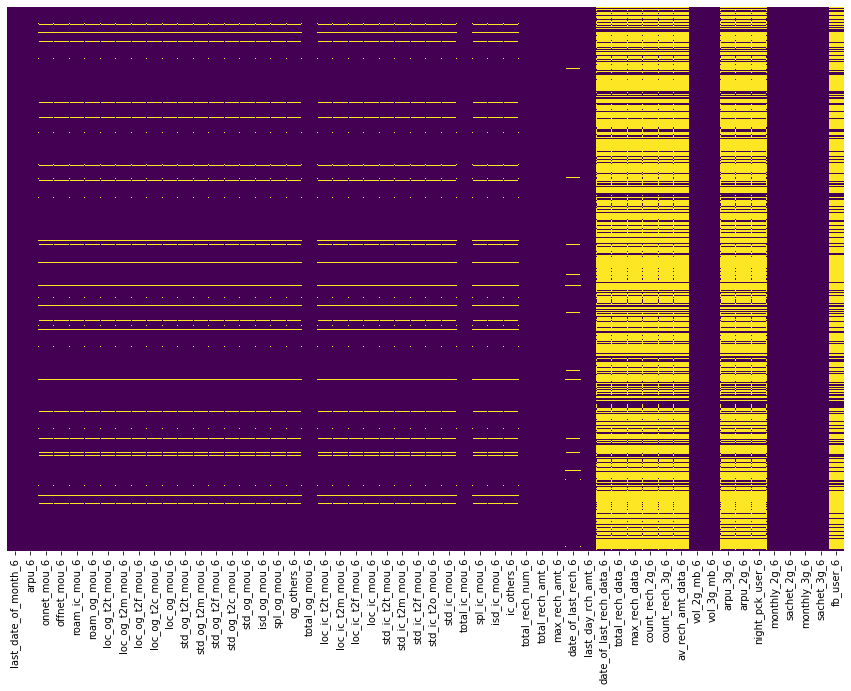

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_6'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

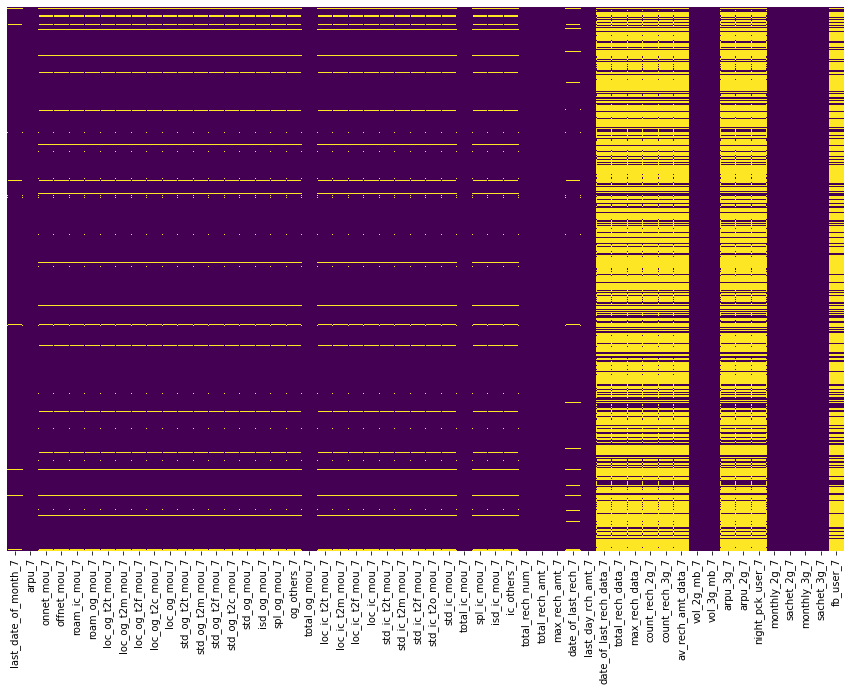

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_7'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

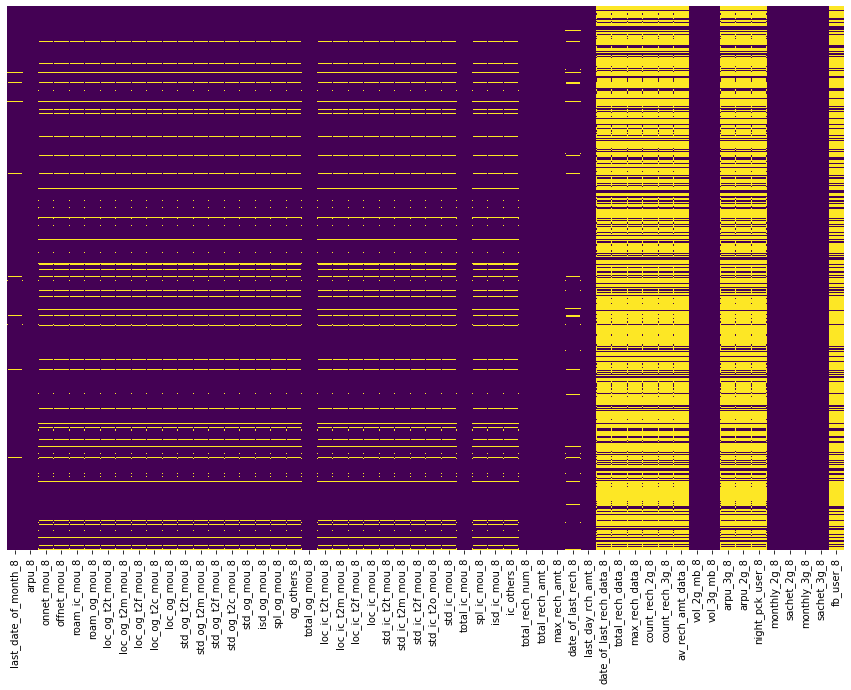

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_8'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [18]:
#dropping cols
telecom = telecom.drop(['date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6','date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7','date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8'], axis=1)

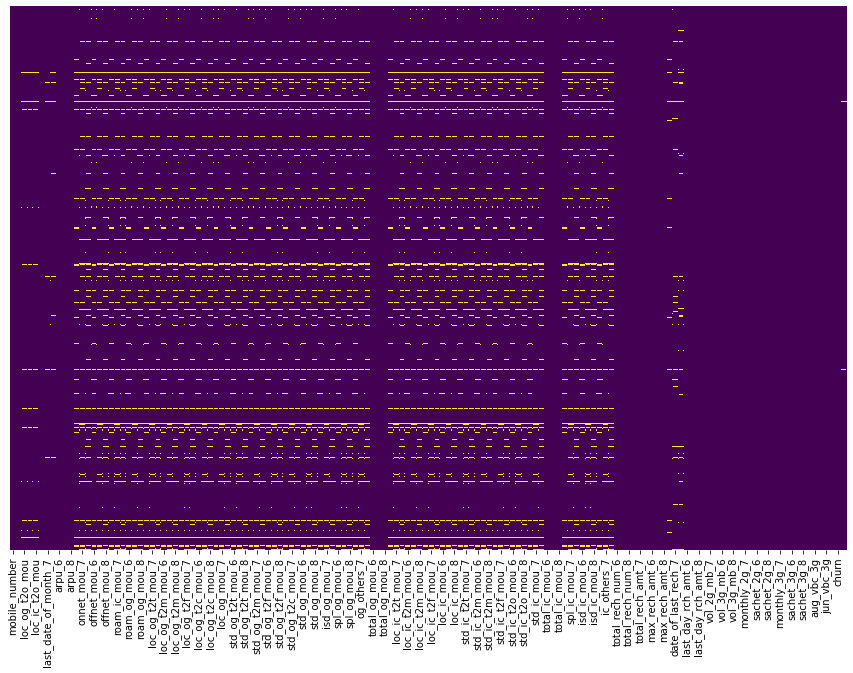

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [20]:
telecom.describe(percentiles=[0.01, 0.1, 0.5, 0.75, 0.9, 0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99814.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,132.395875,133.670805,133.018098,197.935577,197.045133,196.574803,9.950013,7.149898,7.292981,13.911337,9.818732,9.971890,47.100763,46.473010,45.887806,93.342088,91.397131,91.755128,3.751013,3.792985,3.677991,1.123056,1.

In [21]:
telecom = telecom.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)
telecom.shape

(99999, 129)

In [22]:
telecom.isnull().sum()

mobile_number            0
circle_id                0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6           3937
onnet_mou_7           3859
onnet_mou_8           5378
offnet_mou_6          3937
offnet_mou_7          3859
offnet_mou_8          5378
roam_ic_mou_6         3937
roam_ic_mou_7         3859
roam_ic_mou_8         5378
roam_og_mou_6         3937
roam_og_mou_7         3859
roam_og_mou_8         5378
loc_og_t2t_mou_6      3937
loc_og_t2t_mou_7      3859
loc_og_t2t_mou_8      5378
loc_og_t2m_mou_6      3937
loc_og_t2m_mou_7      3859
loc_og_t2m_mou_8      5378
loc_og_t2f_mou_6      3937
loc_og_t2f_mou_7      3859
loc_og_t2f_mou_8      5378
loc_og_t2c_mou_6      3937
loc_og_t2c_mou_7      3859
loc_og_t2c_mou_8      5378
loc_og_mou_6          3937
loc_og_mou_7          3859
loc_og_mou_8          5378
std_og_t2t_mou_6      3937
std_og_t2t_mou_7      3859
std_og_t2t_mou_8      5378
std_og_t2m_mou_6      3937
std_og_t2m_mou_7      3859
s

In [23]:
telecom.describe(percentiles=[0.01, 0.1, 0.5, 0.75, 0.9, 0.99])

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt
count,9.999900e+04,99999.0,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99814.000000
mean,7.001207e+09,109.0,282.987358,278.536648,279.154731,132.395875,133.670805,133.018098,197.935577,197.045133,196.574803,9.950013,7.149898,7.292981,13.911337,9.818732,9.971890,47.100763,46.473010,45.887806,93.342088,91.397131,91.755128,3.751013,3.792985,3.677991,1.123056,1.368500,1.433821,144.201175,141.670476,141.328209,79.829870,83.299598,83.282673,87.299624,90.804137,89.838390,1.129011,1.115010,1.067792,168.261218,175.221436,174.191498,0.798277,0.776572,0.791247,3.916811,4.978279,5.053769,0.454157

In [24]:
telecom = telecom.dropna(axis='rows', how='any')
telecom.shape

(91162, 129)

In [25]:
telecom.isnull().sum()

mobile_number         0
circle_id             0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6    

In [26]:
telecom.churn.value_counts()

False    85695
True      5467
Name: churn, dtype: int64

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

In [52]:
X = telecom.drop('churn', axis=1)
y = telecom['churn']

feature_cols = X.columns

# Handle class imbalance
nm = NearMiss()
X, y = nm.fit_sample(X, y)

# X = X.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1)

# X = X.astype('float64').dtypes

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10934 entries, 0 to 10933
Columns: 128 entries, mobile_number to av_rech_amt
dtypes: float64(101), int64(27)
memory usage: 10.7 MB


In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
)

In [33]:
# voting_clf.fit(X_train, y_train)
# voting_clf.predict(X_test, y_test)
# y_pred = voting_clf(X_test)
# accuracy_score(y_test, y_pred)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.8387364921030757
RandomForestClassifier 0.8883347187586589
SVC 0.8736492103075644


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.8819617622610141


In [46]:
# rnd_clf.fit(X_train, y_train)
# y_pred = rnd_clf.predict(X_test)
# accuracy_score(y_test, y_pred)

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn', 'av_rech_amt'],
      dtype='object', length=129)

In [53]:
#Feature Importance

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
importance = dtc.feature_importances_

for i,v in enumerate(importance):
    print("Feature : {0}, importance : {1}".format(feature_cols[i],v))

Feature : mobile_number, importance : 0.031129114994013395
Feature : circle_id, importance : 0.0
Feature : arpu_6, importance : 0.0267124837469911
Feature : arpu_7, importance : 0.12624472139887635
Feature : arpu_8, importance : 0.007751528042716662
Feature : onnet_mou_6, importance : 0.002685778804989878
Feature : onnet_mou_7, importance : 0.007378467467266494
Feature : onnet_mou_8, importance : 0.0026425678401802346
Feature : offnet_mou_6, importance : 0.006810238366555477
Feature : offnet_mou_7, importance : 0.0027930253996603597
Feature : offnet_mou_8, importance : 0.006201616332996149
Feature : roam_ic_mou_6, importance : 0.003699738140694055
Feature : roam_ic_mou_7, importance : 0.0004908715932254414
Feature : roam_ic_mou_8, importance : 0.25129941868867417
Feature : roam_og_mou_6, importance : 0.0
Feature : roam_og_mou_7, importance : 0.0026337959763912105
Feature : roam_og_mou_8, importance : 0.0007490014583948139
Feature : loc_og_t2t_mou_6, importance : 0.0026534863783915495
F

array([3.11291150e-02, 0.00000000e+00, 2.67124837e-02, 1.26244721e-01,
       7.75152804e-03, 2.68577880e-03, 7.37846747e-03, 2.64256784e-03,
       6.81023837e-03, 2.79302540e-03, 6.20161633e-03, 3.69973814e-03,
       4.90871593e-04, 2.51299419e-01, 0.00000000e+00, 2.63379598e-03,
       7.49001458e-04, 2.65348638e-03, 3.19323667e-03, 7.09946846e-04,
       2.87249112e-03, 4.95679196e-03, 4.12664144e-03, 2.19916195e-03,
       1.09479816e-03, 1.68108522e-03, 2.20049805e-03, 5.72546174e-04,
       3.23176847e-04, 9.67216294e-03, 2.91260244e-03, 4.60974887e-03,
       1.52326369e-03, 3.01661441e-03, 1.38916006e-03, 7.08900152e-03,
       2.19993809e-03, 1.39153000e-03, 8.76984967e-04, 1.26867679e-03,
       1.68697400e-03, 4.16019402e-03, 1.33558922e-03, 3.96680870e-03,
       0.00000000e+00, 1.12459423e-03, 1.11715506e-03, 3.32752078e-03,
       3.57540275e-03, 1.94494500e-03, 5.36914773e-03, 0.00000000e+00,
       0.00000000e+00, 2.45076197e-02, 2.77725915e-02, 1.00689602e-02,
      

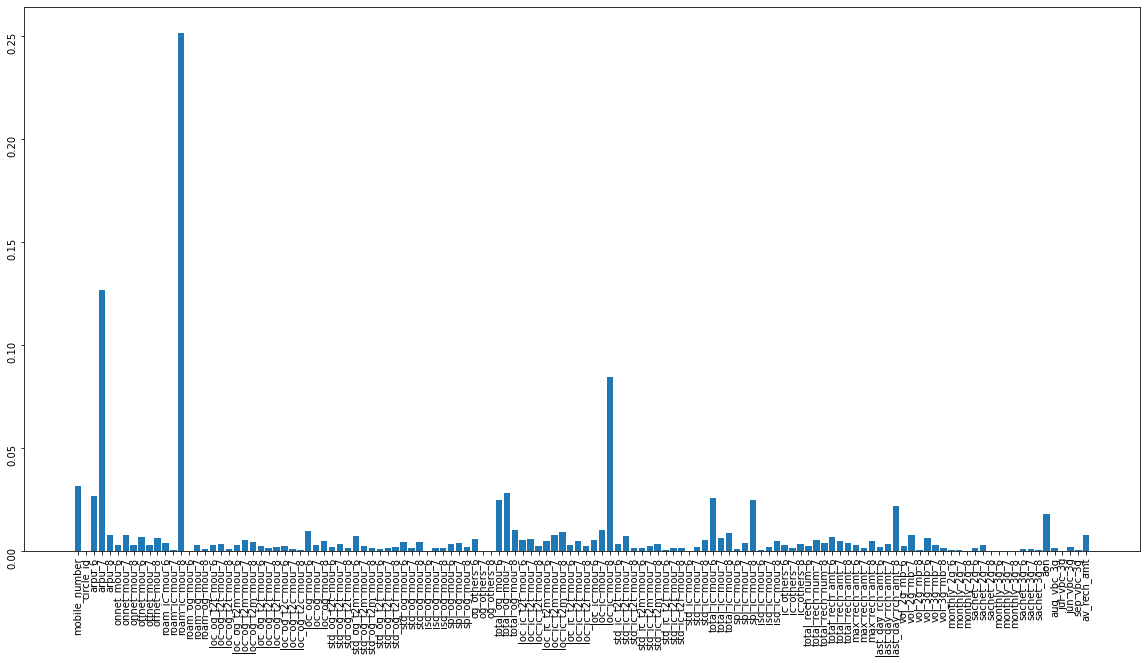

In [63]:
plt.figure(figsize=(20,10))
plt.bar(feature_cols, importance)
plt.tick_params(rotation=90)
plt.show()